In [11]:
#import necessary modules - pandas and numpy packages
import numpy as np
import pandas as pd

#read IMDB Datasets - movies and  ratings file
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [12]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [13]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [14]:
# Many-to-one joins - joins in which one of the two key columns contains duplicate entries
movies_ratings = pd.merge(movies, ratings)

In [5]:
movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [15]:
#See Descriptive statistics of the merge files
movies_ratings.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [16]:
#The first 20 most-frequently watched movies
count_views = movies_ratings['title'].value_counts()[:20]
count_views

Pulp Fiction (1994)                                                               325
Forrest Gump (1994)                                                               311
Shawshank Redemption, The (1994)                                                  308
Jurassic Park (1993)                                                              294
Silence of the Lambs, The (1991)                                                  290
Star Wars: Episode IV - A New Hope (1977)                                         273
Matrix, The (1999)                                                                261
Terminator 2: Judgment Day (1991)                                                 253
Schindler's List (1993)                                                           248
Braveheart (1995)                                                                 248
Fugitive, The (1993)                                                              244
Toy Story (1995)                                      

In [17]:
index = count_views.index
index

Index(['Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Shawshank Redemption, The (1994)', 'Jurassic Park (1993)',
       'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Matrix, The (1999)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       'Braveheart (1995)', 'Fugitive, The (1993)', 'Toy Story (1995)',
       'Usual Suspects, The (1995)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Star Wars: Episode VI - Return of the Jedi (1983)', 'Batman (1989)',
       'American Beauty (1999)', 'Back to the Future (1985)',
       'Godfather, The (1972)'],
      dtype='object')

In [20]:
values = count_views.values
values

array([325, 311, 308, 294, 290, 273, 261, 253, 248, 248, 244, 232, 228,
       228, 224, 222, 217, 216, 213, 210])

In [21]:
# Rating counts - More movies have rating of 5.0 
movies_ratings['rating'].value_counts()

4.0    28880
3.0    21729
5.0    14856
3.5    12237
4.5     8187
2.0     7943
2.5     5484
1.0     3258
1.5     1567
0.5     1198
Name: rating, dtype: int64

In [ ]:
#movies_ratings[movies_ratings.rating == '5.0']

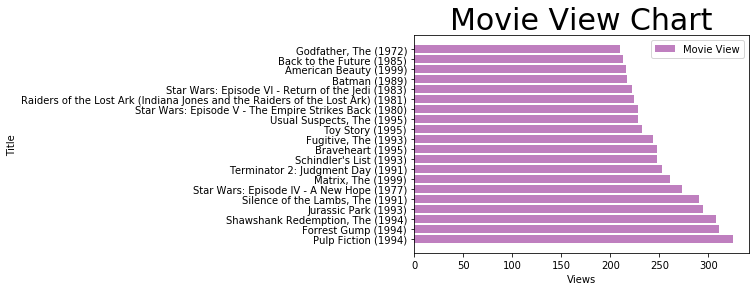

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

#set figure
f, ax = plt.subplots(1,1)

#graph histogram
plt.barh(index, values, alpha=0.5, color='purple', label='Movie View')

#set legend
plt.legend(loc='upper right')

#set title & axis titles
ax.set_title('Movie View Chart', fontsize=30)
ax.set_ylabel('Title')
ax.set_xlabel('Views')

plt.show()

In [49]:
ave_ratings = movies_ratings.groupby('title')['rating'].mean()[:20]
ave_ratings

title
'71 (2014)                                                3.500000
'Hellboy': The Seeds of Creation (2004)                   3.000000
'Round Midnight (1986)                                    2.500000
'Til There Was You (1997)                                 4.000000
'burbs, The (1989)                                        3.125000
'night Mother (1986)                                      3.000000
(500) Days of Summer (2009)                               3.932432
*batteries not included (1987)                            3.318182
...And Justice for All (1979)                             3.650000
10 (1979)                                                 2.000000
10 Items or Less (2006)                                   3.833333
10 Things I Hate About You (1999)                         3.491525
10 to Midnight (1983)                                     2.500000
10,000 BC (2008)                                          2.409091
100 Girls (2000)                                        

In [54]:
ave_ratings_index = ave_ratings.index
ave_ratings_index

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)', '10 Items or Less (2006)',
       '10 Things I Hate About You (1999)', '10 to Midnight (1983)',
       '10,000 BC (2008)', '100 Girls (2000)', '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '101 Reykjavik (101 Reykjavík) (2000)', '102 Dalmatians (2000)',
       '10th & Wolf (2006)'],
      dtype='object', name='title')

In [57]:
ave_ratings_values = ave_ratings.values

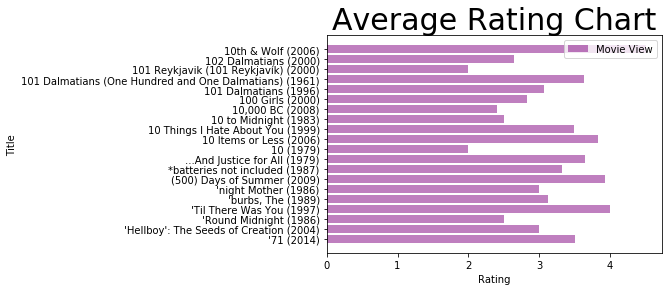

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

#set figure
f, ax = plt.subplots(1,1)

#graph histogram
plt.barh(ave_ratings_index, ave_ratings_values, alpha=0.5, color='purple', label='Movie View')

#set legend
plt.legend(loc='upper right')

#set title & axis titles
ax.set_title('Average Rating Chart', fontsize=30)
ax.set_ylabel('Title')
ax.set_xlabel('Rating')

plt.show()